In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
missing_data=train.isnull().sum()
missing_data=missing_data.sort_values(ascending=False)
missing_data

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

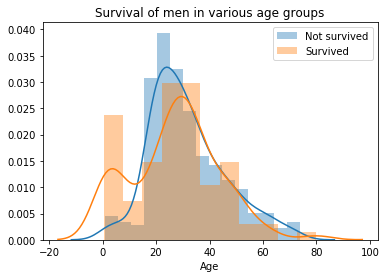

In [6]:
male=train[train['Sex']=='male']
men=sns.distplot(male['Age'].dropna()[male['Survived']==0],label='Not survived')
men=sns.distplot(male['Age'].dropna()[male['Survived']==1],label='Survived')
men.set_title('Survival of men in various age groups')
men.legend()

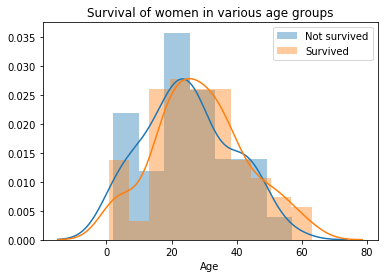

In [7]:
female=train[train['Sex']=='female']
wamen=sns.distplot(female['Age'].dropna()[female['Survived']==0],label='Not survived')
wamen=sns.distplot(female['Age'].dropna()[female['Survived']==1],label='Survived')
wamen.set_title('Survival of women in various age groups')
wamen.legend()

Text(0.5, 1.0, 'Survival of people boarded at different ports')

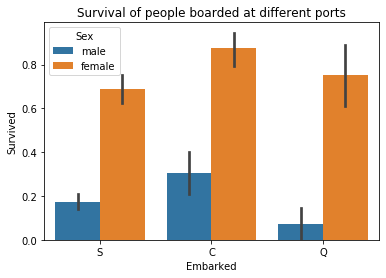

In [8]:
emb=sns.barplot(x=train['Embarked'].dropna(),y=train['Survived'],hue=train['Sex'])
emb.set_title("Survival of people boarded at different ports")

Text(0.5, 1.0, 'Chances of survival in different classes')

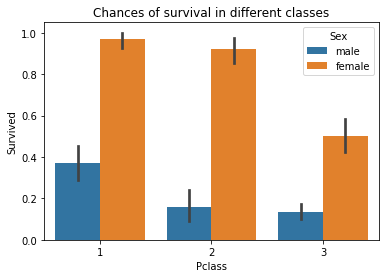

In [9]:
sns.barplot(x='Pclass', y='Survived',hue='Sex', data=train).set_title("Chances of survival in different classes")

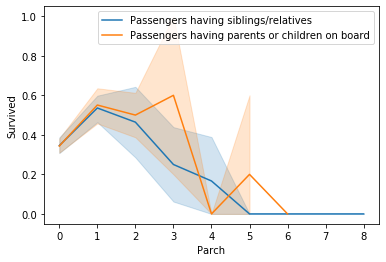

In [10]:
sns.lineplot(x=train['SibSp'],y=train['Survived'],label='Passengers having siblings/relatives')
sns.lineplot(x=train['Parch'],y=train['Survived'],label='Passengers having parents or children on board')

In [11]:
age_mean=train['Age'].mean()
age_std=train['Age'].std()
no_of_mv=train['Age'][train['Age'].isnull()==True].size
fill_age=np.random.randint(age_mean-age_std,age_mean+age_std,size=no_of_mv)
train['Age'][train['Age'].isnull()==True]=fill_age
train['Embarked'].loc[61]='S'
train['Embarked'].loc[829]='S'
sex_map={"male":1,"female":0}
train=train.replace({'male':1,'female':0})
port_map={'S':1,'C':2,'Q':3}
train=train.replace(port_map)
train['Embarked']=train['Embarked'].astype(int)
train=train.drop(['PassengerId'],axis=1)
train=train.drop(['Name'],axis=1)
train=train.drop(['Ticket'],axis=1)
train=train.drop(['Cabin'],axis=1)
train['Age']=train['Age'].astype(int)
train['Age'][train['Age']<=10]=0
train['Age'][(train['Age']>10)&(train['Age']<=17)]=1
train['Age'][(train['Age']>17)&(train['Age']<=25)]=2
train['Age'][(train['Age']>25)&(train['Age']<=30)]=3
train['Age'][(train['Age']>30)&(train['Age']<=35)]=4
train['Age'][(train['Age']>35)&(train['Age']<=40)]=5
train['Age'][(train['Age']>40)&(train['Age']<=50)]=6
train['Age'][(train['Age']>50)&(train['Age']<=65)]=7
train['Age'][(train['Age']>65)&(train['Age']<=80)]=8
train['Fare'][train['Fare']<=7]=0
train['Fare'][(train['Fare']>7)&(train['Fare']<=14)]=1
train['Fare'][(train['Fare']>14)&(train['Fare']<=31)]=2
train['Fare'][(train['Fare']>31)&(train['Fare']<=50)]=3
train['Fare'][(train['Fare']>50)&(train['Fare']<=100)]=4
train['Fare'][(train['Fare']>100)&(train['Fare']<=250)]=5
train['Fare'][train['Fare']>250]=6
train['Fare'] = train['Fare'].astype(int)

In [12]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,1,1
1,1,1,0,5,1,0,4,2
2,1,3,0,3,0,0,1,1
3,1,1,0,4,1,0,4,1
4,0,3,1,4,0,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,1,3,0,0,1,1
887,1,1,0,2,0,0,2,1
888,0,3,0,2,1,2,2,1
889,1,1,1,3,0,0,2,2


In [13]:
y = train['Survived']
x = train.drop(['Survived'],axis=1)

In [14]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,1,0,1,1
1,1,0,5,1,0,4,2
2,3,0,3,0,0,1,1
3,1,0,4,1,0,4,1
4,3,1,4,0,0,1,1
...,...,...,...,...,...,...,...
886,2,1,3,0,0,1,1
887,1,0,2,0,0,2,1
888,3,0,2,1,2,2,1
889,1,1,3,0,0,2,2


In [15]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state = 30)

In [17]:
X_train['Survived'] = y_train

In [18]:
ind = X_train.index

In [19]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
143,3,1,2,0,0,0,3,0
867,1,1,4,0,0,4,1,0
285,3,1,4,0,0,1,2,0
536,1,1,6,0,0,2,1,0
511,3,1,5,0,0,1,1,0
...,...,...,...,...,...,...,...,...
140,3,0,4,0,2,2,2,0
500,3,1,1,0,0,1,1,0
813,3,0,0,4,2,3,1,0
421,3,1,2,0,0,1,3,0


In [20]:
age_dict = {2:0,4:1,6:2,3:3,8:4,7:5,1:6,0:7,5:8}
class_dict = {3:0,1:1,2:2}
sex_dict = {1:0,0:1}
rel_dict = {0:0,1:1,2:2,3:3,4:4,8:5,5:6}
parch_dic = {0:0,1:1,2:2,6:3,3:4,5:5,4:6}
fare_dict = {0:0,4:1,1:2,2:3,5:4,3:5,6:6}
emb_dict = {3:0,1:1,2:2}

In [21]:
def no_of_survived(str,int):
    return X_train[X_train[str]==int][X_train['Survived']==1].index.size
def no_of_dead(str,int):
    return X_train[X_train[str]==int][X_train['Survived']==0].index.size  

In [22]:
total_Survived = X_train[X_train['Survived']==1].index.size
total_not_survived = X_train[X_train['Survived']==0].index.size
age_prob_survival = []
age_prob_dead = []
for i in range(0,9):
    age_prob_survival.append(np.divide(no_of_survived('Age',i),total_Survived))
    age_prob_dead.append(np.divide(no_of_dead('Age',i),total_not_survived))
rel_prob_sur = []
rel_prob_dead = []
for i in X_train['SibSp'].unique():
    rel_prob_sur.append(np.divide(no_of_survived('SibSp',i),total_Survived))
    rel_prob_dead.append(np.divide(no_of_dead('SibSp',i),total_not_survived))
parch_sur = []
parch_dead = []
for i in X_train['Parch'].unique():
    parch_sur.append(np.divide(no_of_survived('Parch',i),total_Survived))
    parch_dead.append(np.divide(no_of_dead('Parch',i),total_not_survived))
fare_sur = []
fare_dead = []
for i in X_train['Fare'].unique():
    fare_sur.append(np.divide(no_of_survived('Fare',i),total_Survived))
    fare_dead.append(np.divide(no_of_dead('Fare',i),total_not_survived))
emb_sur = []
emb_dead = []
for i in X_train['Embarked'].unique():
    emb_sur.append(np.divide(no_of_survived('Embarked',i),total_Survived))
    emb_dead.append(np.divide(no_of_dead('Embarked',i),total_not_survived))
class_sur = []
class_dead = []
for i in X_train['Pclass'].unique():
    class_sur.append(np.divide(no_of_survived('Pclass',i),total_Survived))
    class_dead.append(np.divide(no_of_dead('Pclass',i),total_not_survived))
sex_sur = []
sex_dead = []
for i in X_train['Sex'].unique():
    sex_sur.append(np.divide(no_of_survived('Sex',i),total_Survived))
    sex_dead.append(np.divide(no_of_dead('Sex',i),total_not_survived))

In [23]:
def prob_sur(arr):
    f = np.zeros(7,dtype=int)
    f[0] = class_dict[arr[0]]
    f[1] = sex_dict[arr[1]]
    f[2] = age_dict[arr[2]]
    f[3] = rel_dict[arr[3]]
    f[4] = parch_dic[arr[4]]
    f[5] = fare_dict[arr[5]]
    f[6] = emb_dict[arr[6]]
    return (class_sur[f[0]])*(sex_sur[f[1]])*(age_prob_survival[f[2]])*(rel_prob_sur[f[3]])*(parch_sur[f[4]])*(fare_sur[f[5]])*(emb_sur[f[6]])
def prob_dead(arr):
    f = np.zeros(7,dtype=int)
    f[0] = class_dict[arr[0]]
    f[1] = sex_dict[arr[1]]
    f[2] = age_dict[arr[2]]
    f[3] = rel_dict[arr[3]]
    f[4] = parch_dic[arr[4]]
    f[5] = fare_dict[arr[5]]
    f[6] = emb_dict[arr[6]]
    return (class_dead[f[0]])*(sex_dead[f[1]])*(age_prob_dead[f[2]])*(rel_prob_dead[f[3]])*(parch_dead[f[4]])*(fare_dead[f[5]])*(emb_dead[f[6]])

In [24]:
survival = []
dead = []
for i in X_test.index:
    survival.append(prob_sur(X_test.loc[i]))
    dead.append(prob_dead(X_test.loc[i]))

In [25]:
prediction = []
for i in range(0,len(dead)):
    if survival[i]>dead[i]:
        prediction.append(1)
    else:
        prediction.append(0)

In [26]:
y_test = y_test.reset_index()
y_test = y_test.drop(['index'],axis = 1)

In [44]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for i in range(0,len(prediction)):
    if(y_test.loc[i][0] == prediction[i])&(prediction[i]==1):
        true_positive = true_positive + 1
    if(y_test.loc[i][0] == prediction[i])&(prediction[i]==0):
        true_negative = true_negative +1
    if(y_test.loc[i][0]==0)&(prediction[i]==1):
        false_positive = false_positive + 1
    if(y_test.loc[i][0]==1)&(prediction[i]==0):
        false_negative = false_negative + 1

In [46]:
accuracy = np.divide(true_positive + true_negative,true_negative+true_positive+false_negative+false_positive)

In [47]:
accuracy

0.7354260089686099

In [48]:
precision = np.divide(true_positive,true_positive+false_positive)

In [49]:
precision

0.6896551724137931

In [50]:
recall = np.divide(true_positive,true_positive+false_negative)

In [51]:
recall

0.6521739130434783

In [52]:
f1 = np.divide(2*recall*precision,recall+precision)

In [53]:
f1

0.670391061452514

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
X_train = X_train.drop(['Survived'],axis=1)

In [56]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
model.score(X_test,y_test)

0.7623318385650224